In [1]:
import numpy as np

In [22]:
class KMeans:
    
    def __init__(self,k,max_iter=300,random_state = 0):
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state
        
    def fit(self,X):
        
        #randomly pick up k data points as centroids
        X_samples = X.shape[0]
        self.centroids = X[np.random.choice(X_samples, self.k, replace = False)]
        
        #repeat
        for i in range(self.max_iter):
            #clustering
            self.cluster = {}  #build the clusters
            for i in range(X_samples):
                distance = np.linalg.norm(X[i]-self.centroids, axis = 1)
                classification = np.argmin(distance)   # find out the index of centroids
                if classification in self.cluster:
                    self.cluster[classification].append(X[i])
                else:
                    self.cluster[classification] = [X[i]]
                
            previous_centroids = self.centroids.copy()
            
            for classification in self.cluster:
                self.centroids[classification] = np.mean(self.cluster[classification], axis = 0)
            
            #if converged
            tolerance = 1e-5
            converged = True
            for i in range(self.k):
                pre_centroid = previous_centroids[i]
                current_centroid = self.centroids[i]
                if np.sum((current_centroid - pre_centroid)/pre_centroid*100.0)>=tolerance:
                    converged = False
            if converged:
                break
    
    def predict(self,X):
        result = []
        for i in range(X.shape[0]):
            distance = np.linalg.norm(X[i] - self.centroids, axis = 1)
            classification = np.argmin(distance)
            result.append(classification)
        return result
    
    def centroids_(self):
        return self.centroids


In [23]:
import matplotlib.pyplot as plt
from sklearn import datasets

#loard iris dataset
iris = datasets.load_iris()
X = iris.data[:,:2]

kmeans =KMeans(k=4,max_iter=300,random_state = 0)

# fit the kmeans
kmeans.fit(X)

#predict
y_pred = kmeans.predict(X)

#get the final centroids
centroids =kmeans.centroids_()

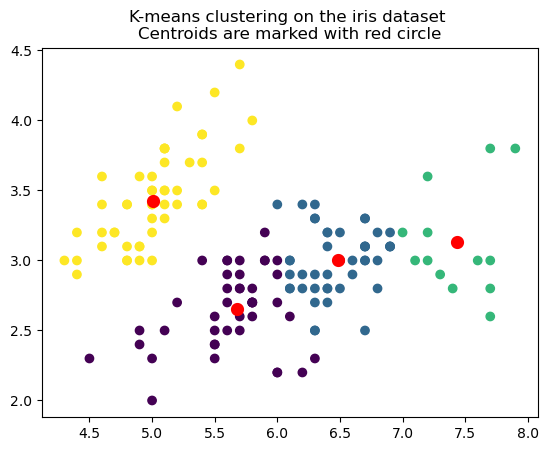

In [24]:
#visulization
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.scatter(centroids[:,0],centroids[:,1],marker = 'o', s=20, linewidth = 5, color = 'r',zorder = 10)
plt.title('K-means clustering on the iris dataset \n'
          'Centroids are marked with red circle')
plt.show()
